# Imports

In [179]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import gridspec as gridspec
import seaborn as sns 

import ast

In [180]:
! pip install openpyxl

## Funções Auxiliares

In [181]:
def barplot(title:str, 
            group:str, 
            agg:str, 
            agg_name:str, 
            data:pd.DataFrame, 
            agg_func:str, 
            figure= plt.figure, 
            title_font_size:int =10, 
            figsize=(10,5),
            subplot:plt.subplot = None, 
            grid:list = None, 
            label=True,
            rotation_label:int = 45,
            position_label:str = 'center',
            color_label:str = 'white',
            size_label:str = 'small',
            sort: bool = True, 
            hue:str = None,
            stacked:bool = False,
            orient:str = 'h'):
    
    group_list = [group]
    if hue:
        group_list.append(hue)

    # group data
    aux = data[group_list + [agg]].groupby(group_list).agg(agg_func).reset_index().rename(columns={agg:agg_name})

    if sort:
        aux = aux.sort_values(agg_name, ascending=False)
        
    # plot
    if subplot:
        subplot(grid)
    else:
        figure(figsize=figsize)

    # plot configs
    plt.title(title, fontsize=title_font_size)
    plt.xticks(rotation = rotation_label)

    # figure
    if orient == 'h':
        g = sns.barplot(x = group, y = agg_name, hue = hue, dodge = not stacked, data = aux)
    elif orient == 'v':
        g = sns.barplot(y = group, x = agg_name, hue = hue, dodge = not stacked, data = aux)
    else:
        raise('Valor de oriente inválido')

    if label:
        for i in g.containers:
            g.bar_label(i, color = color_label, label_type=position_label, fontsize = size_label)
    else:
        pass

def unstacked_plot(
            title:str, 
            group:str, 
            hue:str,
            agg_name:str, 
            data:pd.DataFrame, 
            subplot:plt.subplot = None, 
            grid:list = None, 
            title_font_size:int =10, 
            figsize=(10,5),
            column_order:list = [],
            label=True, 
            rotation_label:int = 45,
            position_label:str = 'center',
            color_label:str = 'white',
            size_label:str = 'small',
            sort: bool = True, 
            normalize:bool=True,
            fmt:str = '%.2f'
            ):
        

    df_grouped = data[[group, hue]].groupby(group).value_counts(normalize=normalize).unstack(hue)

    if column_order != []:
        df_grouped = df_grouped.loc[column_order]

    # figure
    g = df_grouped.plot.bar(stacked=True,figsize=figsize);

    # plot configs
    plt.title(title, fontsize=title_font_size)
    plt.xticks(rotation = rotation_label)

    if label:
        for i in g.containers:
            g.bar_label(i, color = color_label ,label_type=position_label, fontsize = size_label, fmt=fmt)
    else:
        pass

    return None

def histplot(title:str, col:str, data:pd.DataFrame, figsize=(10,5), label=True):

    plt.figure(figsize=figsize)
    plt.title(title)
    g = sns.histplot(x = col,  data = data)
    plt.xticks(rotation = 45)
    if label:
        for i in g.containers:
            g.bar_label(i, color = 'white',label_type='center')
    else:
        pass


# Carregando Dados

In [182]:
df_full = pd.read_excel('../data/data_clean/vagas_gupy_clean.xlsx')
df_full.head()

,site_da_vaga,link_site,link_origem,data_publicacao,data_expiracao,data_coleta,posicao,senioridade,titulo_vaga,nome_empresa,...,modalidade,contrato,regime,pcd,beneficios,habilidades_macro,habilidades_micro,competencias,codigo_vaga,descricao
0,Gupy,https://stefanini.gupy.io/job/eyJqb2JJZCI6Njk5...,https://stefanini.gupy.io/job/eyJqb2JJZCI6Njk5...,2024-04-08,2024-04-30,2024-04-10,Cientista de Dados,Pleno,Cientista de Dados PL/SR,Stefanini Group,...,Remoto,Efetivo,NaN,Também p/ PcD,"['Assistência médica', 'Assistência odontológi...","['Cloud', 'Engenharia de Software', 'Machine L...","['Azure', 'Git', 'Machine Learning', 'Java', '...",NaN,6996672,📢 Oportunidade para Cientista de Dados PL/SR!H...
1,Gupy,https://bancosofisa.gupy.io/job/eyJqb2JJZCI6Nj...,https://bancosofisa.gupy.io/job/eyJqb2JJZCI6Nj...,2024-04-08,2024-05-10,2024-04-10,Cientista de Dados,Não informado,Cientista de Dados,Banco Sofisa,...,Híbrido,Efetivo,NaN,Também p/ PcD,"['Assistência médica', 'Assistência odontológi...","['Machine Learning', 'SQL']","['Machine Learning', 'SQL']",NaN,6983660,Qual perfil buscamos?Pessoas engajadas por mud...
2,Gupy,https://vemprabip.gupy.io/job/eyJqb2JJZCI6Njk4...,https://vemprabip.gupy.io/job/eyJqb2JJZCI6Njk4...,2024-04-08,2024-05-08,2024-04-10,Cientista de Dados,Pleno,Pessoa Cientista de Dados Pleno,Bip Brasil,...,Remoto,Efetivo,NaN,Também p/ PcD,"['Assistência médica', 'Assistência odontológi...","['Cloud', 'Machine Learning', 'Programação']","['AWS', 'GCP', 'Machine Learning', 'Linguagem ...","['Raciocínio lógico', 'Liderança']",6989597,Buscamos um cientista de dados com experiência...
3,Gupy,https://algartelecom.gupy.io/job/eyJqb2JJZCI6N...,https://algartelecom.gupy.io/job/eyJqb2JJZCI6N...,2024-04-08,2024-04-08,2024-04-10,Cientista de Dados,Não informado,Pessoa Cientista de Dados,Algar Telecom,...,Híbrido,Associado,NaN,Também p/ PcD,"['Assistência médica', 'Assistência odontológi...","['Cloud', 'Engenharia de Software', 'Machine L...","['AWS', 'Azure', 'Hadoop', 'Machine Learning',...",['Raciocínio lógico'],6961243,"Executar a limpeza, tratamento e organização d..."
4,Gupy,https://mutantbrvagas.gupy.io/job/eyJqb2JJZCI6...,https://mutantbrvagas.gupy.io/job/eyJqb2JJZCI6...,2024-04-05,2024-04-30,2024-04-10,Cientista de Dados,Sênior,Cientista de Dados Sênior,Mutant,...,Híbrido,Efetivo,NaN,Também p/ PcD,"['Assistência médica', 'Assistência odontológi...","['Engenharia de Software', 'Machine Learning',...","['Git', 'Machine Learning', 'Pacote Office', '...","['Storytelling', 'Colaboração']",6986643,O QUE É SER UM MUTANT?Quando você decide ser M...


# Análise Descritiva dos Dados

In [183]:
df1 = df_full.copy()

In [184]:
# df1 = df1.loc[df1['site_da_vaga'] != 'Glassdoor']

## Dimensão dos Dados

In [185]:
print(f'Total de Linhas {df1.shape[0]}')
print(f'Total de Colunas {df1.shape[1]}')

Total de Linhas 417
Total de Colunas 22


## Tratando NAs

In [186]:
df1.isna().sum()

site_da_vaga           0
link_site              0
link_origem            0
data_publicacao        0
data_expiracao         0
data_coleta            0
posicao                0
senioridade            0
titulo_vaga            0
nome_empresa           0
cidade                 0
estado                 0
modalidade             0
contrato               0
regime               417
pcd                    0
beneficios           102
habilidades_macro     41
habilidades_micro     41
competencias         113
codigo_vaga            0
descricao             28
dtype: int64

### Removendo NAs

In [187]:
df1 = df1.dropna(subset=['cidade'])

### Preenchendo NAs

In [188]:
df1.loc[df1['senioridade'].isna(), 'senioridade'] = 'Não informado'
df1.loc[df1['contrato'].isna(), 'contrato'] = 'Efetivo'

In [189]:
df1.isna().sum()

site_da_vaga           0
link_site              0
link_origem            0
data_publicacao        0
data_expiracao         0
data_coleta            0
posicao                0
senioridade            0
titulo_vaga            0
nome_empresa           0
cidade                 0
estado                 0
modalidade             0
contrato               0
regime               417
pcd                    0
beneficios           102
habilidades_macro     41
habilidades_micro     41
competencias         113
codigo_vaga            0
descricao             28
dtype: int64

## Tipo das Variáveis

In [190]:
df1.dtypes

site_da_vaga          object
link_site             object
link_origem           object
data_publicacao       object
data_expiracao        object
data_coleta           object
posicao               object
senioridade           object
titulo_vaga           object
nome_empresa          object
cidade                object
estado                object
modalidade            object
contrato              object
regime               float64
pcd                   object
beneficios            object
habilidades_macro     object
habilidades_micro     object
competencias          object
codigo_vaga            int64
descricao             object
dtype: object

In [191]:
df1['data_publicacao'] = pd.to_datetime(df1['data_publicacao'])
df1['data_expiracao'] = pd.to_datetime(df1['data_expiracao'])
df1['data_coleta'] = pd.to_datetime(df1['data_coleta'])

In [192]:
df1['habilidades_macro'] = df1['habilidades_macro'].apply(lambda x: x if pd.isnull(x) else ast.literal_eval(x))
df1['habilidades_micro'] = df1['habilidades_micro'].apply(lambda x: x if pd.isnull(x) else ast.literal_eval(x))
df1['competencias'] = df1['competencias'].apply(lambda x: x if pd.isnull(x) else ast.literal_eval(x))
df1['beneficios'] = df1['beneficios'].apply(lambda x: x if pd.isnull(x) else ast.literal_eval(x))

In [193]:
df1.dtypes

site_da_vaga                 object
link_site                    object
link_origem                  object
data_publicacao      datetime64[ns]
data_expiracao       datetime64[ns]
data_coleta          datetime64[ns]
posicao                      object
senioridade                  object
titulo_vaga                  object
nome_empresa                 object
cidade                       object
estado                       object
modalidade                   object
contrato                     object
regime                      float64
pcd                          object
beneficios                   object
habilidades_macro            object
habilidades_micro            object
competencias                 object
codigo_vaga                   int64
descricao                    object
dtype: object

## Estatística Descritiva

In [194]:
df1.columns

Index(['site_da_vaga', 'link_site', 'link_origem', 'data_publicacao',
       'data_expiracao', 'data_coleta', 'posicao', 'senioridade',
       'titulo_vaga', 'nome_empresa', 'cidade', 'estado', 'modalidade',
       'contrato', 'regime', 'pcd', 'beneficios', 'habilidades_macro',
       'habilidades_micro', 'competencias', 'codigo_vaga', 'descricao'],
      dtype='object')

In [195]:
df1['posicao'] = df1['posicao'].replace({'Analista':'Analista de Dados','Cientista':'Cientista de Dados','Engenharia de Dados':'Engenheiro de Dados','Não identificado':'Engenheiro de Dados'})

In [196]:
columns = ['site_da_vaga', 'posicao', 'senioridade', 'estado', 'modalidade', 'contrato', 'pcd']
cat_atributes = df1.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

for col in columns:
    print(f'{col}: {cat_atributes[col].unique().tolist()}\n')

site_da_vaga: ['Gupy']

posicao: ['Cientista de Dados', 'Analista de Dados', 'Engenheiro de Dados']

senioridade: ['Pleno', 'Não informado', 'Sênior', 'Júnior', 'Pleno/Sênior', 'Júnior/Pleno']

estado: ['Não informado', 'São Paulo', 'Minas Gerais', 'Goiás', 'Rio de Janeiro', 'Ceará', 'Bahia', 'Paraná', 'Mato Grosso do Sul', 'Espírito Santo', 'Santa Catarina', 'Distrito Federal', 'RJ', 'Rio Grande do Sul', 'Paraíba', 'SP', 'Mato Grosso', 'SC']

modalidade: ['Remoto', 'Híbrido', 'Presencial', 'Efetivo']

contrato: ['Efetivo', 'Associado', 'Pessoa Jurídica', 'Banco de Talentos', 'Estágio', 'Temporário', 'Não informado', 'Autônomo']

pcd: ['Também p/ PcD', 'Não informado']



# Feature Engineering

In [197]:
senioridade_dict = {
    'Júnior/Pleno':'Pleno',
    'Pleno/Sênior':'Sênior',
    'Júnior/Trainee':'Júnior',
    'Auxiliar/Operacional':'Auxiliar',
    'Supervisão/Coordenação': 'Coordenação'
}

df1['senioridade'] = df1['senioridade'].replace(senioridade_dict)

# Análise Exploratória de Dados

Entendendo a distribuição e a relação entre as variáveis

In [198]:
df2 = df1.copy()

## Análise Univariada

### Variáveis Númericas

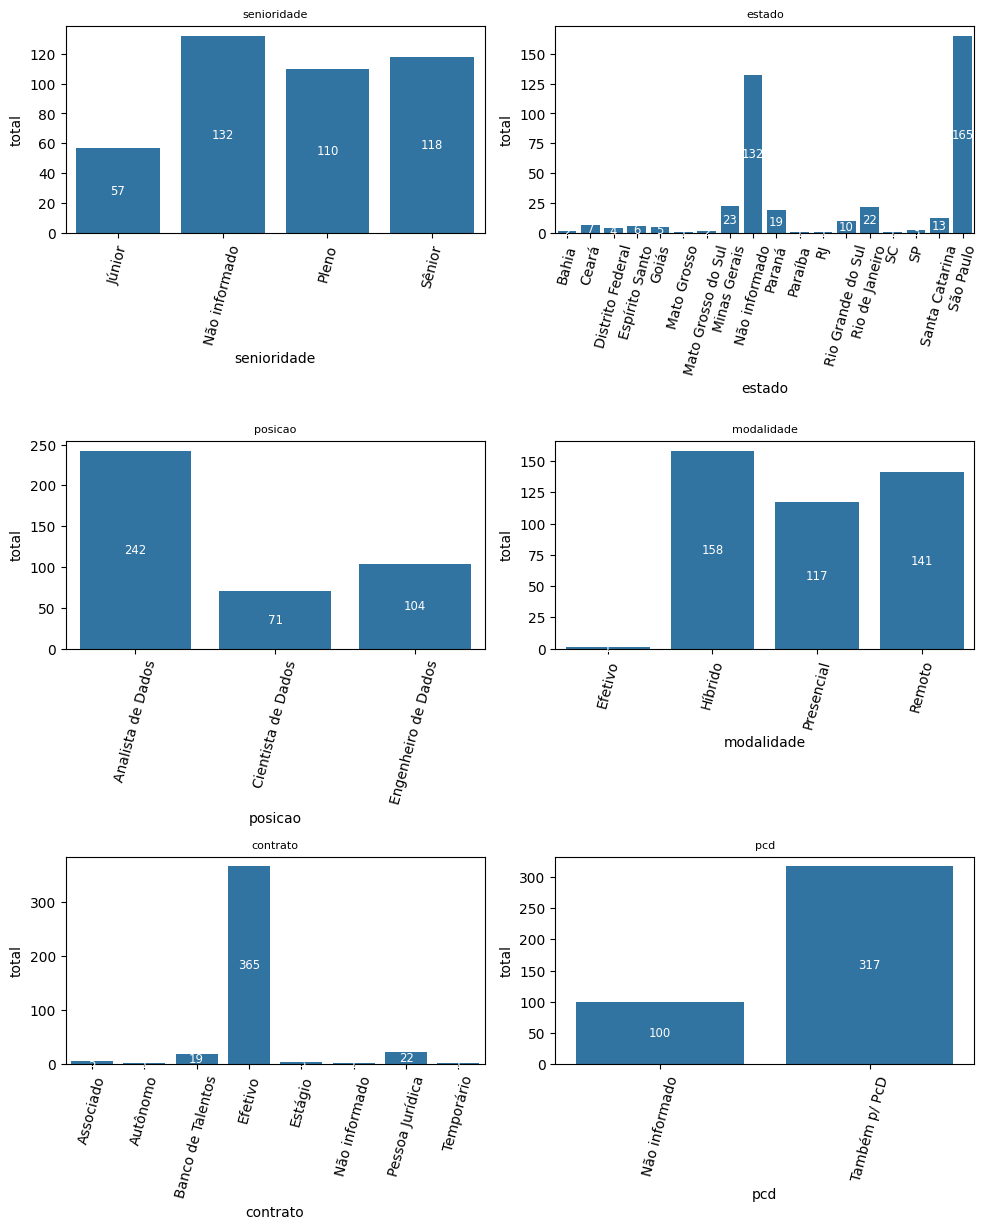

In [199]:
grid = gridspec.GridSpec(4,2)
plt.figure(figsize=(10,15))

cols = ['senioridade', 'estado', 'posicao','modalidade', 'contrato', 'pcd']

for i in range(len(cols)):
    
    q, mod = divmod(i,2)

    f1 = plt.subplot
    col = cols[i]
    barplot(title=f'{col}',
            title_font_size=8,
            group=col,
            agg='link_site', 
            agg_name = 'total',
            agg_func = 'count',
            data = df2,
            subplot = f1,
            grid = grid[q,mod],
            sort=False,
            rotation_label = 75)

plt.tight_layout()

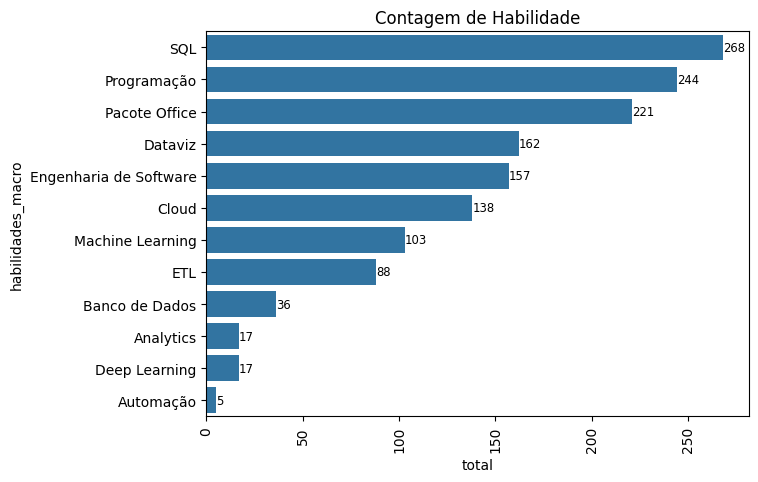

In [200]:
df2_skills = df2.explode('habilidades_macro')

barplot(title='Contagem de Habilidade',
        title_font_size=12,
        group='habilidades_macro',
        agg='link_site', 
        agg_name = 'total',
        agg_func = 'count',
        data = df2_skills,
        figsize=(7,5),
        sort=True,
        label=True,
        rotation_label = 90,
        color_label = 'black',
        position_label='edge',
        size_label='small',
        orient = 'v')

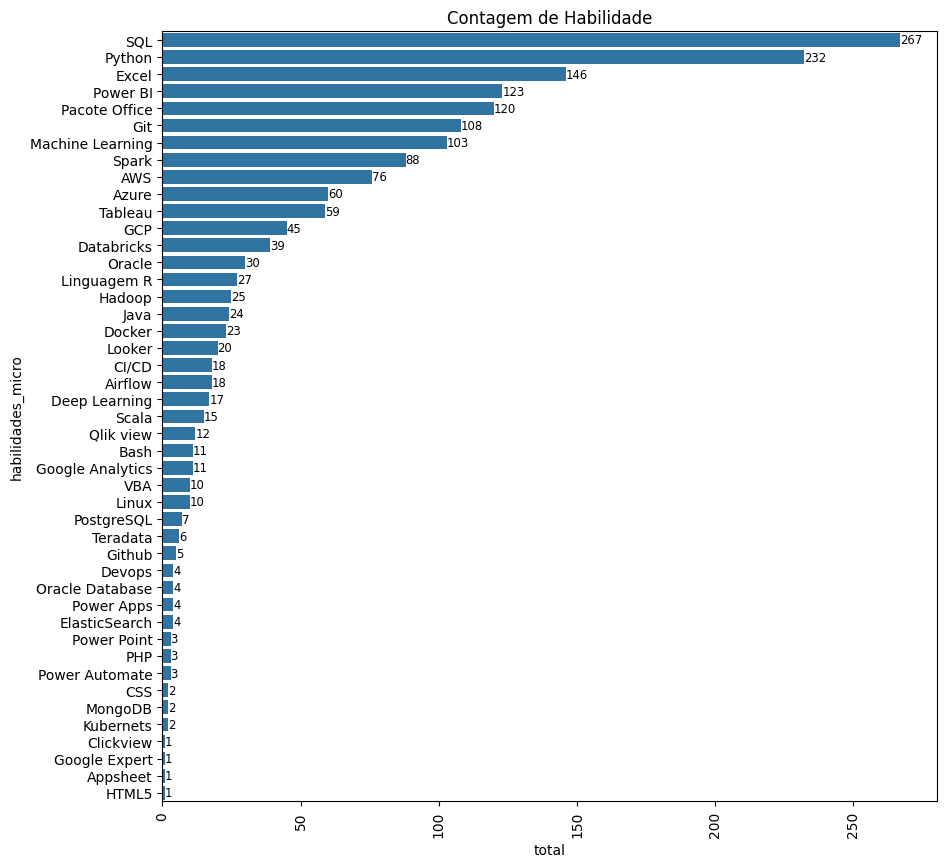

In [201]:
df2_skills = df2.explode('habilidades_micro')

barplot(title='Contagem de Habilidade',
        title_font_size=12,
        group='habilidades_micro',
        agg='link_site', 
        agg_name = 'total',
        agg_func = 'count',
        data = df2_skills,
        figsize=(10,10),
        sort=True,
        label=True,
        rotation_label = 90,
        color_label = 'black',
        position_label='edge',
        size_label='small',
        orient = 'v')

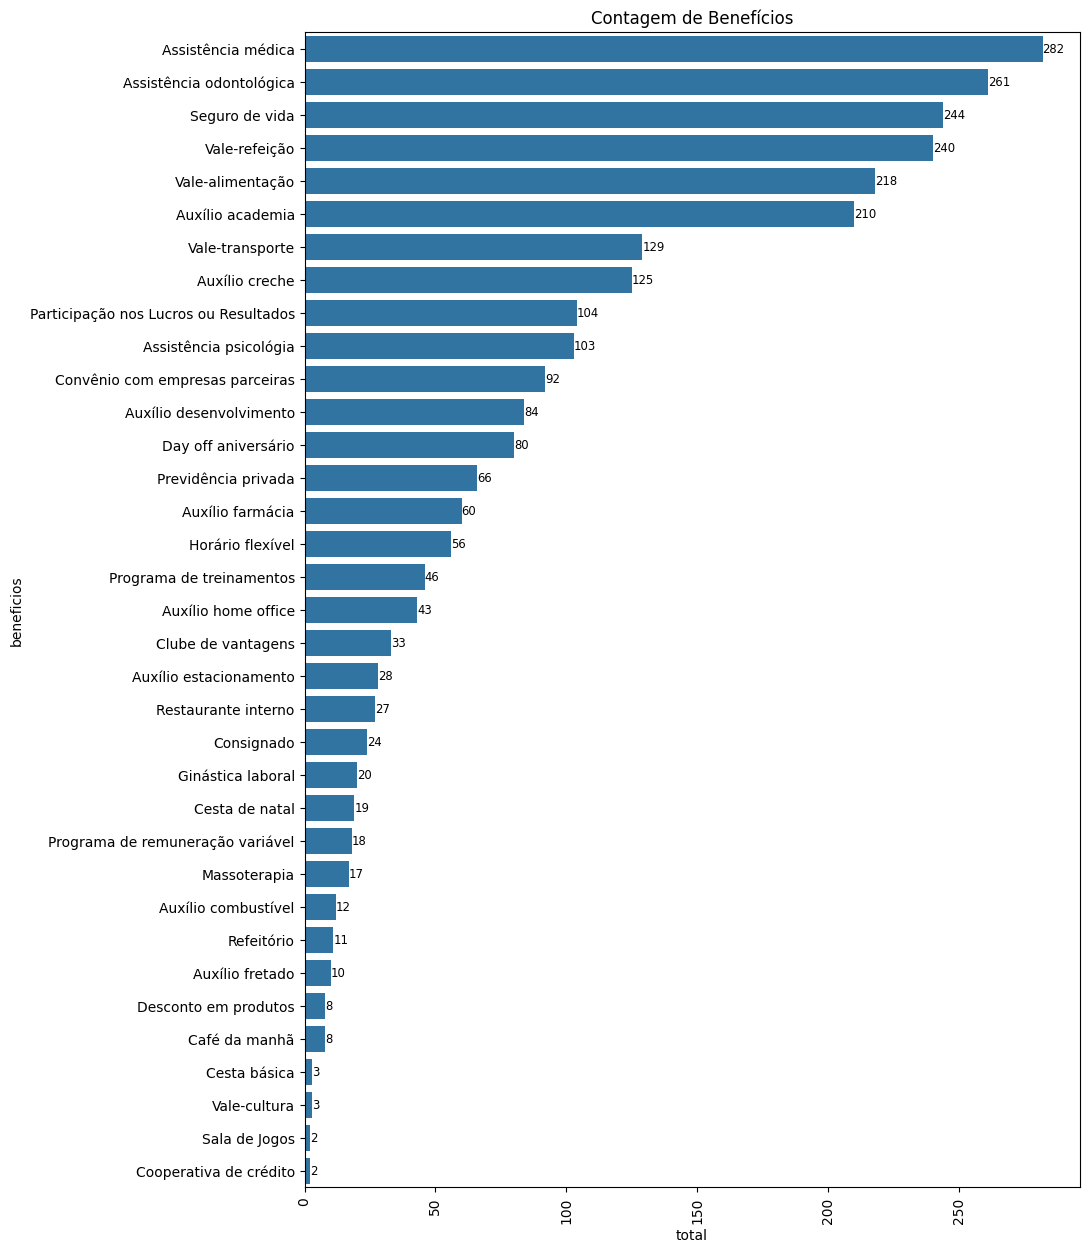

In [202]:
df2_benefits = df2.explode('beneficios')

barplot(title='Contagem de Benefícios',
        title_font_size=12,
        group='beneficios',
        agg='link_site', 
        agg_name = 'total',
        agg_func = 'count',
        data = df2_benefits,
        figsize=(10,15),
        sort=True,
        label=True,
        rotation_label = 90,
        color_label='black',
        position_label='edge',
        size_label='small',
        orient = 'v')

## Análise Bivariada

### Sites

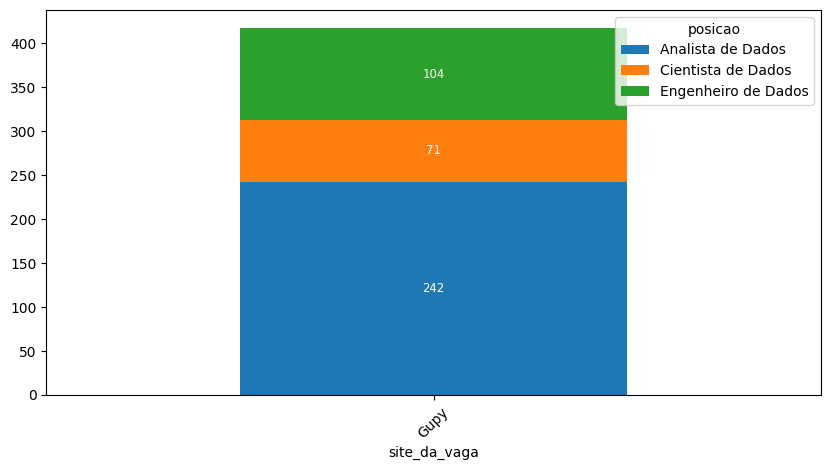

In [203]:
unstacked_plot(
    title = '',
    group='site_da_vaga',
    hue='posicao',
    agg_name='total',
    figsize=(10,5),
    data=df2,
    column_order=df2['site_da_vaga'].unique().tolist(),
    normalize=False,
    fmt = '%.0f'
)

### Senioridade

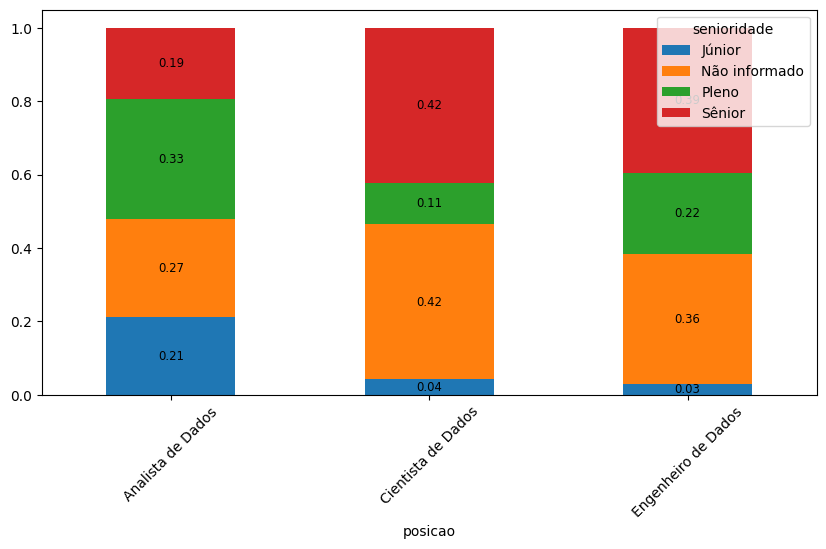

In [204]:
df_aux = df2.loc[df2['senioridade'].isin(['Não informado','Júnior','Pleno','Sênior'])]

unstacked_plot(
    title = '',
    group='posicao',
    hue='senioridade',
    agg_name='total',
    # figsize=(10,5),
    data=df_aux,
    normalize=True,
    color_label='black',
    fmt = '%.2f'
)

### Modalidade

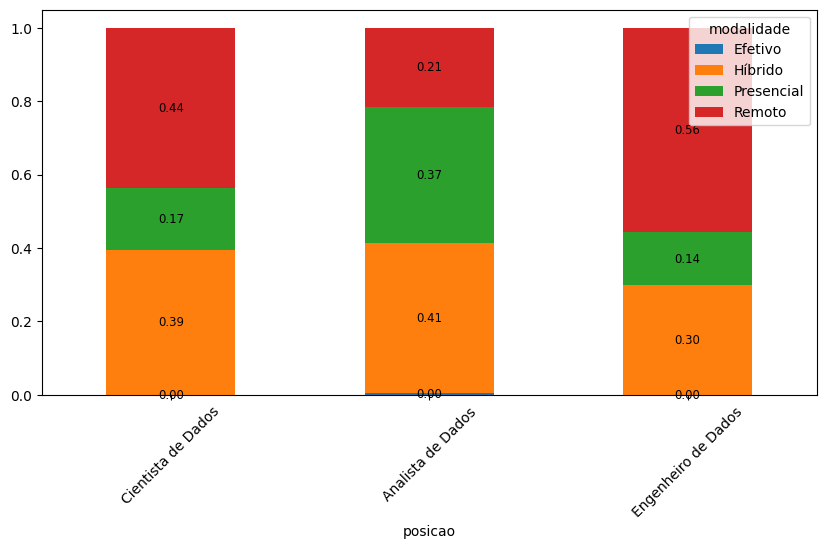

In [205]:
unstacked_plot(
    title = '',
    group='posicao',
    hue='modalidade',
    agg_name='total',
    # figsize=(10,5),
    data=df2,
    column_order=df2['posicao'].unique().tolist(),
    normalize=True,
    color_label='black',
    fmt = '%.2f'
);

### Tipo de Contrato

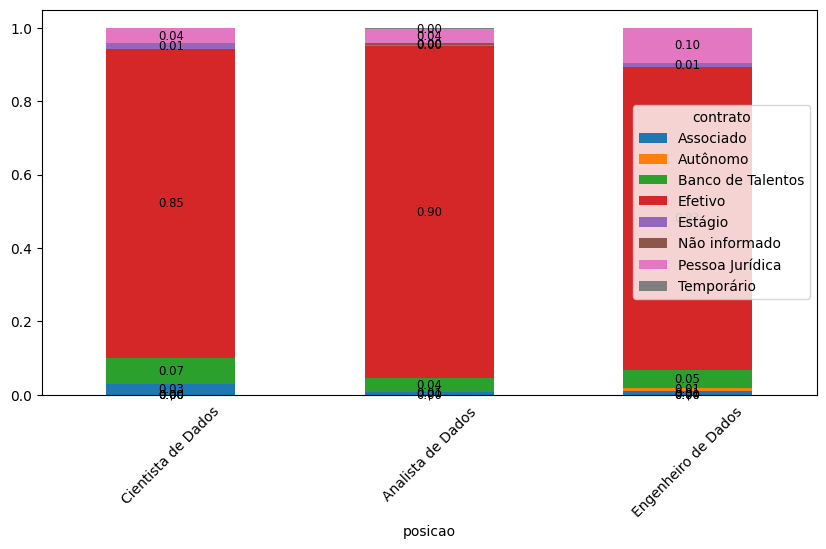

In [206]:
unstacked_plot(
    title = '',
    group='posicao',
    hue='contrato',
    agg_name='total',
    figsize=(10,5),
    data=df2,
    column_order=df2['posicao'].unique().tolist(),
    normalize=True,
    color_label='black',
    fmt = '%.2f'
);

### Remige (CLT, PJ..)

In [207]:
# unstacked_plot(
#     title = '',
#     group='regime',
#     hue='posicao',
#     agg_name='total',
#     figsize=(10,5),
#     data=df2,
#     column_order=df2['regime'].unique().tolist(),
#     normalize=False,
#     color_label='black',
#     fmt = '%.0f'
# );

### Estado

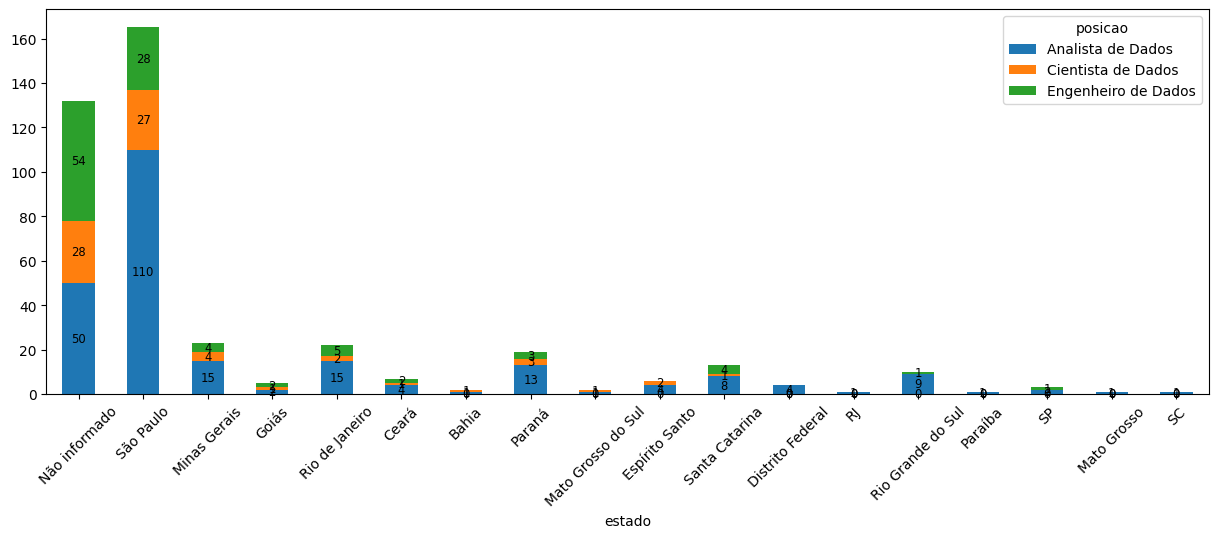

In [208]:
unstacked_plot(
    title = '',
    group='estado',
    hue='posicao',
    agg_name='total',
    figsize=(15,5),
    data=df2,
    column_order=df2['estado'].unique().tolist(),
    normalize=False,
    color_label='black',
    fmt = '%.0f'
);

### Habilidades

In [209]:
df2.loc[df2['posicao'] == 'Analista de Dados'].shape[0]

242

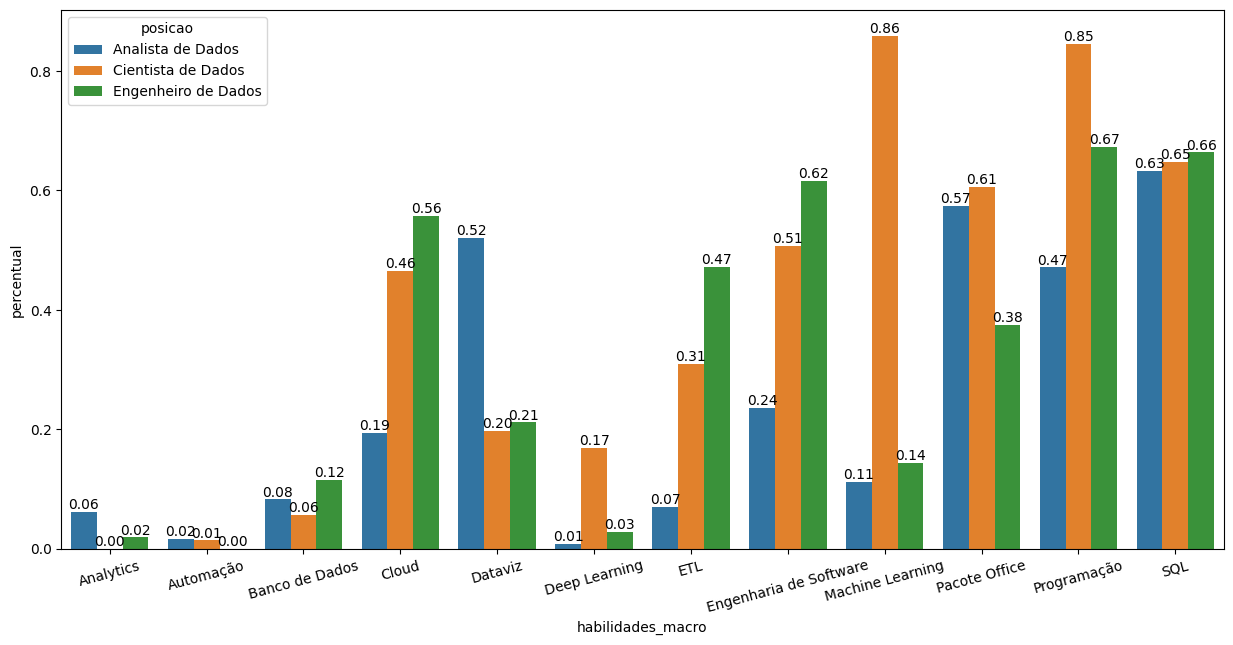

In [210]:
df2_skills = df2.explode('habilidades_macro')
df_aux = pd.crosstab(df2_skills['habilidades_macro'], df2_skills['posicao']).reset_index()
df_aux['Analista de Dados'] = df_aux['Analista de Dados'] / df2.loc[df2['posicao'] == 'Analista de Dados'].shape[0]
df_aux['Cientista de Dados'] = df_aux['Cientista de Dados'] / df2.loc[df2['posicao'] == 'Cientista de Dados'].shape[0]
df_aux['Engenheiro de Dados'] = df_aux['Engenheiro de Dados'] / df2.loc[df2['posicao'] == 'Engenheiro de Dados'].shape[0]

df_aux = df_aux.melt(id_vars=['habilidades_macro'], value_vars=['Analista de Dados','Cientista de Dados','Engenheiro de Dados'], value_name='percentual')

plt.figure(figsize=(15,7))
g = sns.barplot(x = 'habilidades_macro', y ='percentual', hue='posicao', data = df_aux)
plt.xticks(rotation = 15)
for i in g.containers:
    g.bar_label(i, label_type='edge', color = 'black', fmt='%.2f')

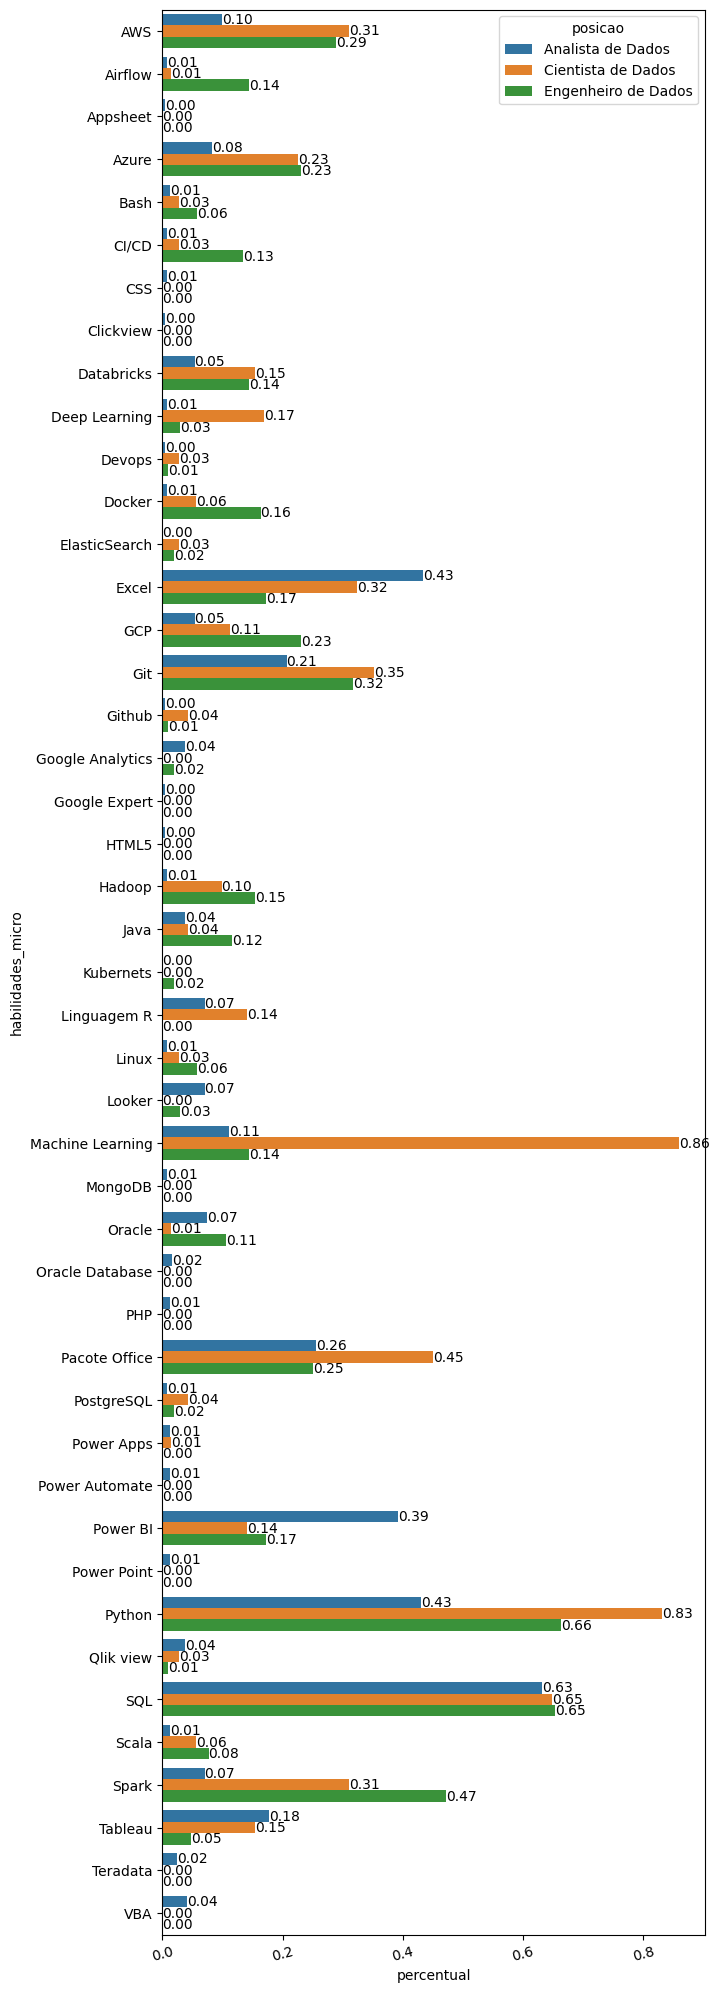

In [211]:
df2_skills = df2.explode('habilidades_micro')

df_aux = pd.crosstab(df2_skills['habilidades_micro'], df2_skills['posicao']).reset_index()
df_aux['Analista de Dados'] = df_aux['Analista de Dados'] / df2.loc[df2['posicao'] == 'Analista de Dados'].shape[0]
df_aux['Cientista de Dados'] = df_aux['Cientista de Dados'] / df2.loc[df2['posicao'] == 'Cientista de Dados'].shape[0]
df_aux['Engenheiro de Dados'] = df_aux['Engenheiro de Dados'] / df2.loc[df2['posicao'] == 'Engenheiro de Dados'].shape[0]

df_aux = df_aux.melt(id_vars=['habilidades_micro'], value_vars=['Analista de Dados','Cientista de Dados','Engenheiro de Dados'], value_name='percentual')

plt.figure(figsize=(7,25))
g = sns.barplot(x = 'percentual', y ='habilidades_micro', hue='posicao', data = df_aux)
plt.xticks(rotation = 15)
for i in g.containers:
    g.bar_label(i, label_type='edge', color = 'black', fmt='%.2f')

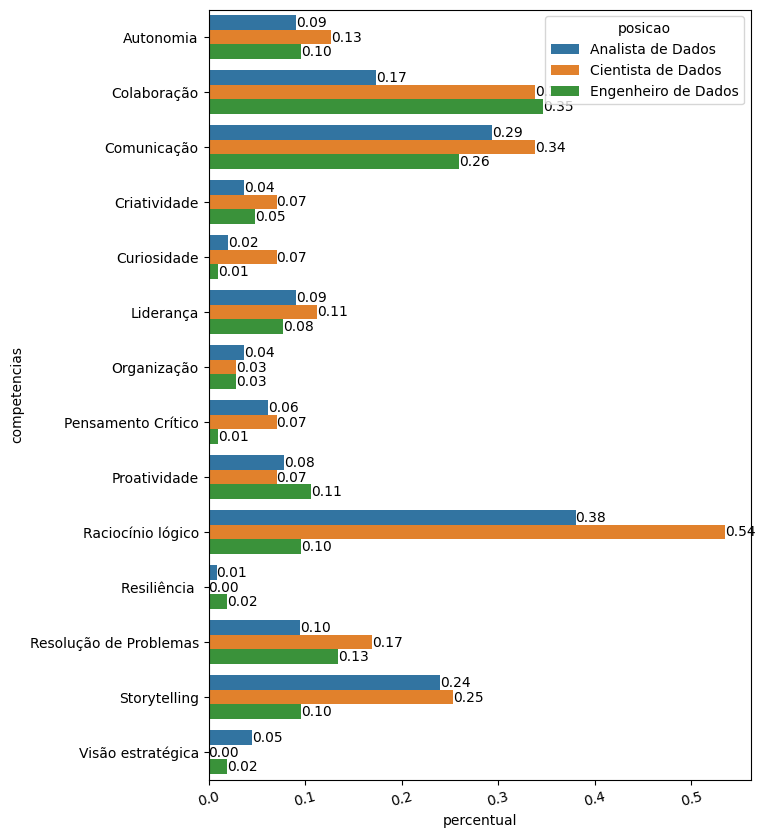

In [212]:
df2_skills = df2.explode('competencias')

df_aux = pd.crosstab(df2_skills['competencias'], df2_skills['posicao']).reset_index()
df_aux['Analista de Dados'] = df_aux['Analista de Dados'] / df2.loc[df2['posicao'] == 'Analista de Dados'].shape[0]
df_aux['Cientista de Dados'] = df_aux['Cientista de Dados'] / df2.loc[df2['posicao'] == 'Cientista de Dados'].shape[0]
df_aux['Engenheiro de Dados'] = df_aux['Engenheiro de Dados'] / df2.loc[df2['posicao'] == 'Engenheiro de Dados'].shape[0]

df_aux = df_aux.melt(id_vars=['competencias'], value_vars=['Analista de Dados','Cientista de Dados','Engenheiro de Dados'], value_name='percentual')

plt.figure(figsize=(7,10))
g = sns.barplot(x = 'percentual', y ='competencias', hue='posicao', data = df_aux)
plt.xticks(rotation = 15)
for i in g.containers:
    g.bar_label(i, label_type='edge', color = 'black', fmt='%.2f')

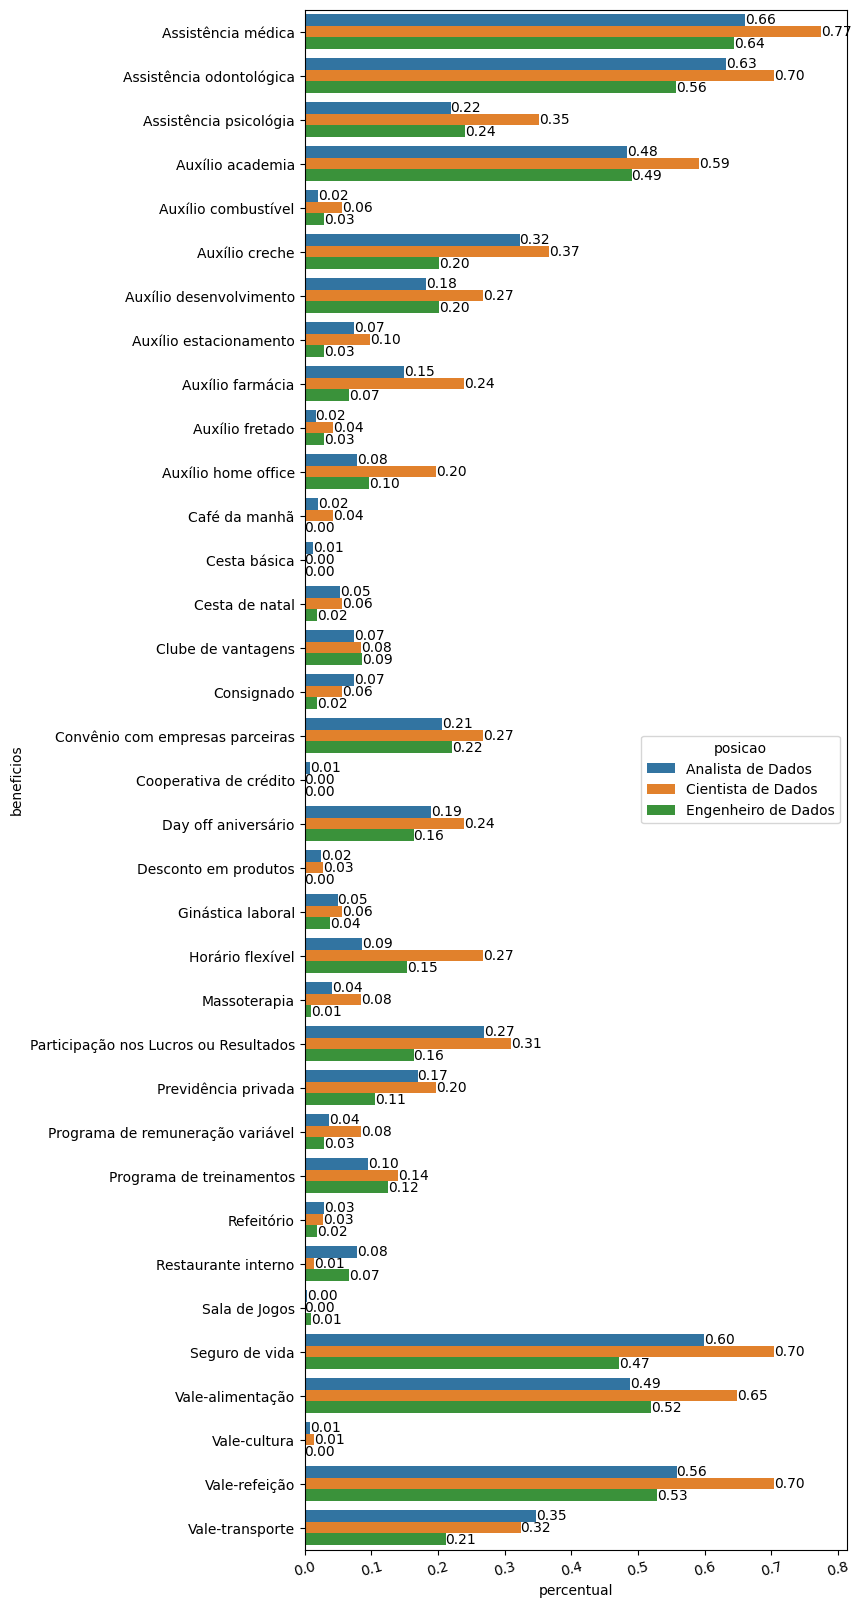

In [213]:
df2_benefits = df2.explode('beneficios')

df_aux = pd.crosstab(df2_benefits['beneficios'], df2_benefits['posicao']).reset_index()
df_aux['Analista de Dados'] = df_aux['Analista de Dados'] / df2.loc[df2['posicao'] == 'Analista de Dados'].shape[0]
df_aux['Cientista de Dados'] = df_aux['Cientista de Dados'] / df2.loc[df2['posicao'] == 'Cientista de Dados'].shape[0]
df_aux['Engenheiro de Dados'] = df_aux['Engenheiro de Dados'] / df2.loc[df2['posicao'] == 'Engenheiro de Dados'].shape[0]

df_aux = df_aux.melt(id_vars=['beneficios'], value_vars=['Analista de Dados','Cientista de Dados','Engenheiro de Dados'], value_name='percentual')

plt.figure(figsize=(7,20))
g = sns.barplot(x = 'percentual', y ='beneficios', hue='posicao', data = df_aux)
plt.xticks(rotation = 15)
for i in g.containers:
    g.bar_label(i, label_type='edge', color = 'black', fmt='%.2f')

## Hipóteses de Negócio

In [214]:
df_analista = df1.loc[df1['posicao'] == 'Analista de Dados']
df_cientista = df1.loc[df1['posicao'] == 'Cientista de Dados']
df_engenheiro = df1.loc[df1['posicao'] == 'Engenheiro de Dados']

### Analista de Dados

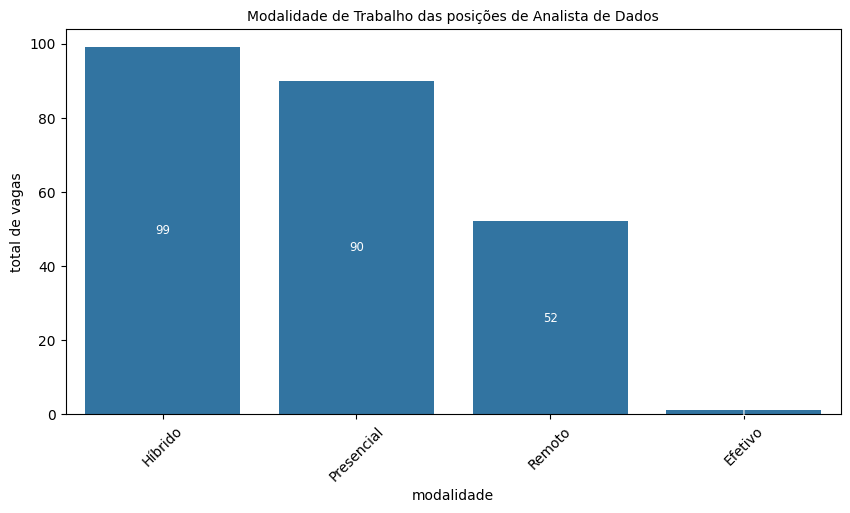

In [215]:
barplot(
    title = 'Modalidade de Trabalho das posições de Analista de Dados',
    group = 'modalidade',
    agg='link_site',
    agg_name='total de vagas',
    agg_func = 'count',
    data = df_analista
)

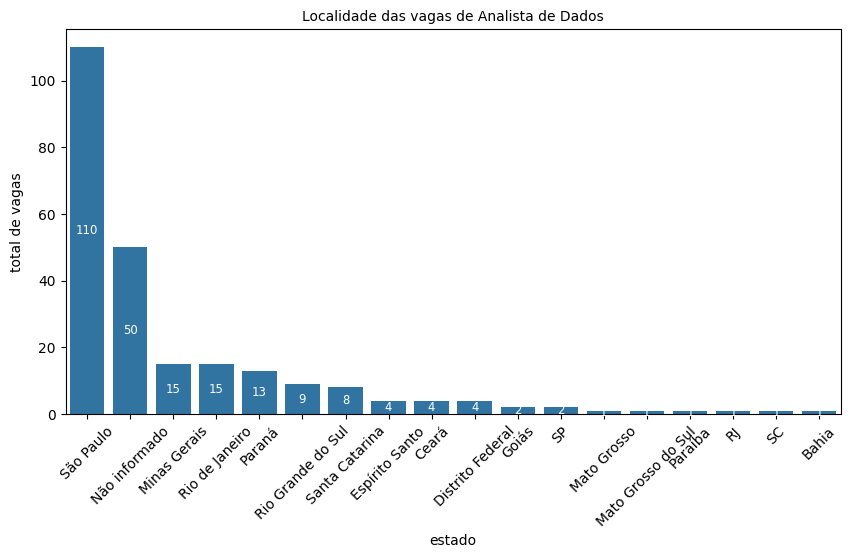

In [216]:
barplot(
    title = 'Localidade das vagas de Analista de Dados',
    group = 'estado',
    agg='link_site',
    agg_name='total de vagas',
    agg_func = 'count',
    data = df_analista
)

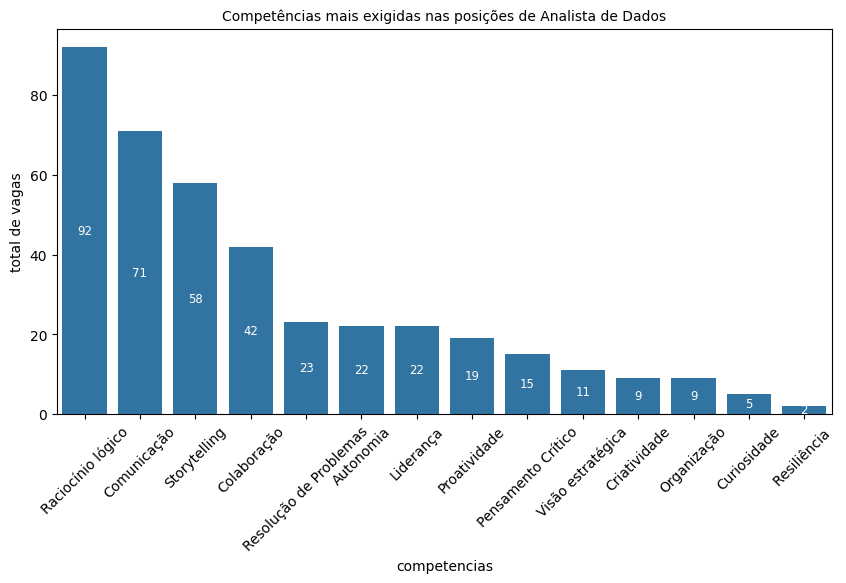

In [217]:
df_analista_aux = df_analista.explode('competencias')

barplot(
    title = 'Competências mais exigidas nas posições de Analista de Dados',
    group = 'competencias',
    agg='link_site',
    agg_name='total de vagas',
    agg_func = 'count',
    data = df_analista_aux
)

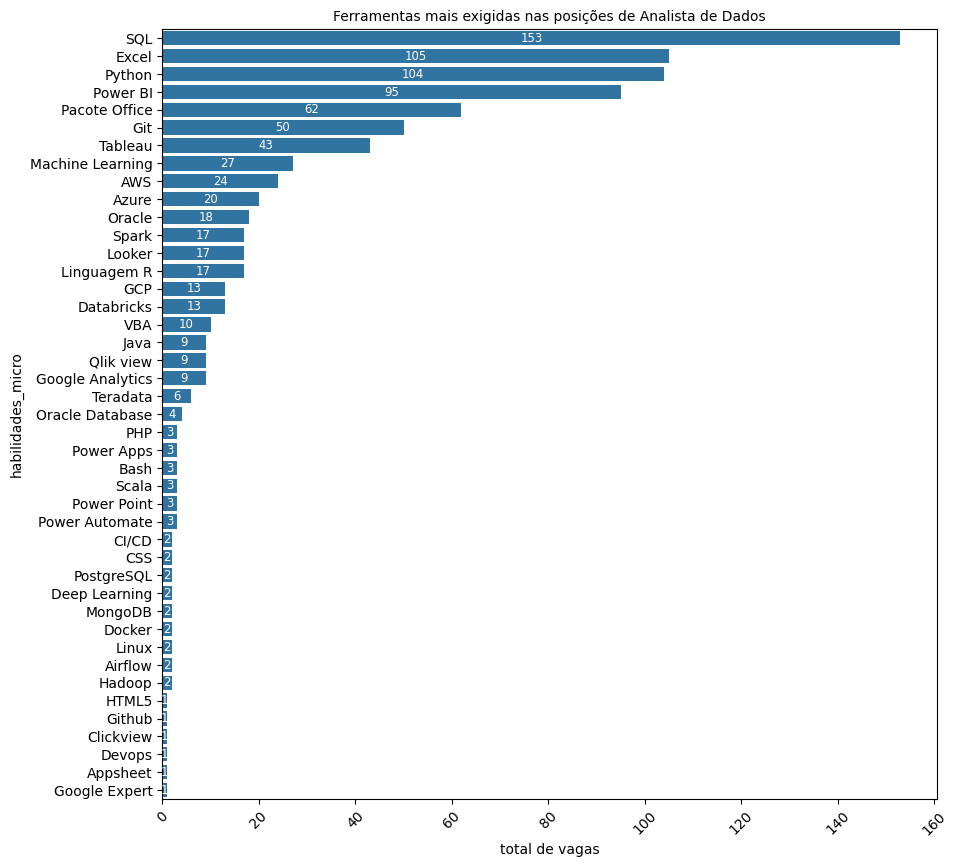

In [218]:
df_analista_aux = df_analista.explode('habilidades_micro')

barplot(
    title = 'Ferramentas mais exigidas nas posições de Analista de Dados',
    group = 'habilidades_micro',
    agg='link_site',
    agg_name='total de vagas',
    agg_func = 'count',
    data = df_analista_aux,
    orient='v',
    figsize=(10,10)
)

### Cientista de Dados

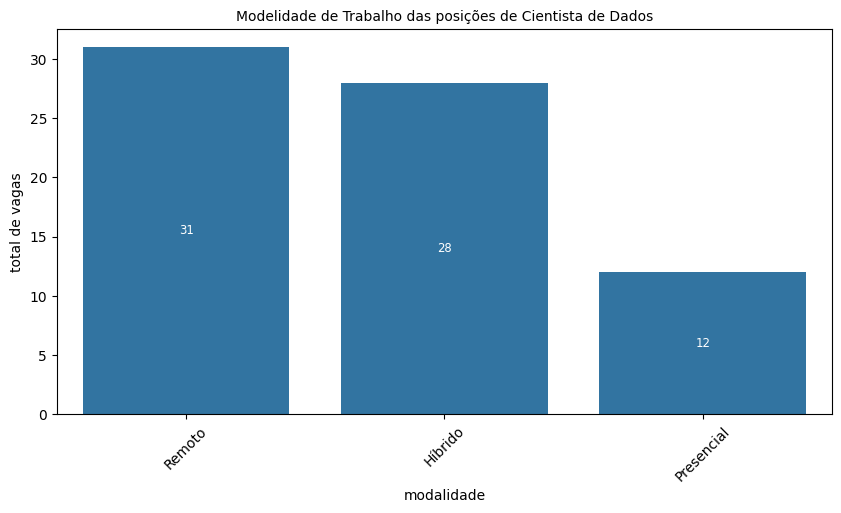

In [219]:
barplot(
    title = 'Modelidade de Trabalho das posições de Cientista de Dados',
    group = 'modalidade',
    agg='link_site',
    agg_name='total de vagas',
    agg_func = 'count',
    data = df_cientista
)

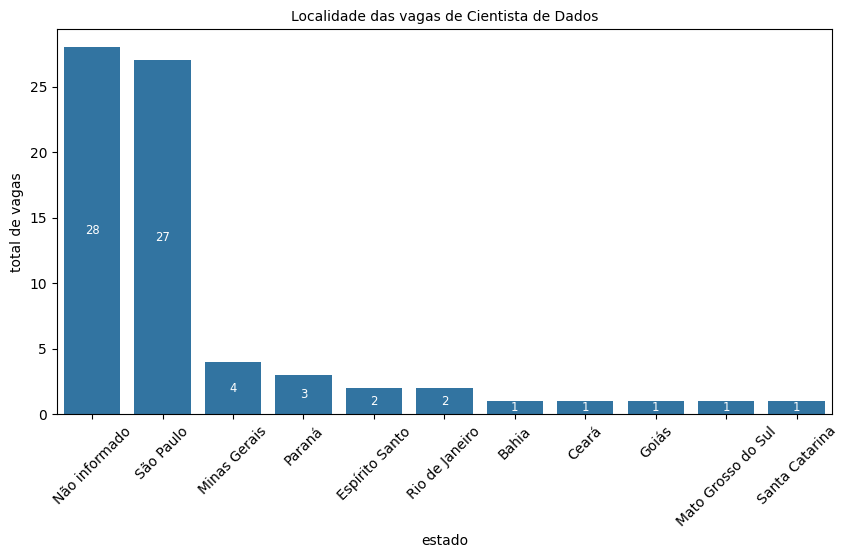

In [220]:
barplot(
    title = 'Localidade das vagas de Cientista de Dados',
    group = 'estado',
    agg='link_site',
    agg_name='total de vagas',
    agg_func = 'count',
    data = df_cientista
)

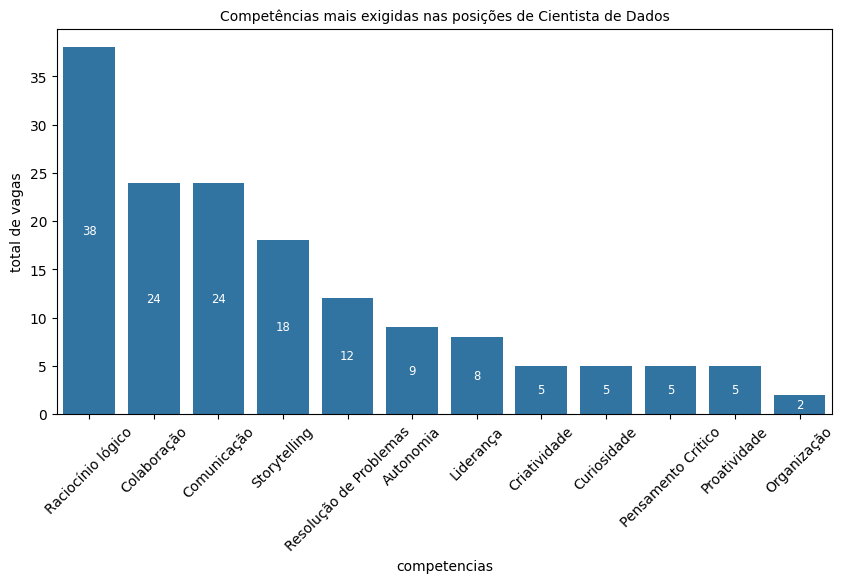

In [221]:
df_aux = df_cientista.explode('competencias')

barplot(
    title = 'Competências mais exigidas nas posições de Cientista de Dados',
    group = 'competencias',
    agg='link_site',
    agg_name='total de vagas',
    agg_func = 'count',
    data = df_aux
)

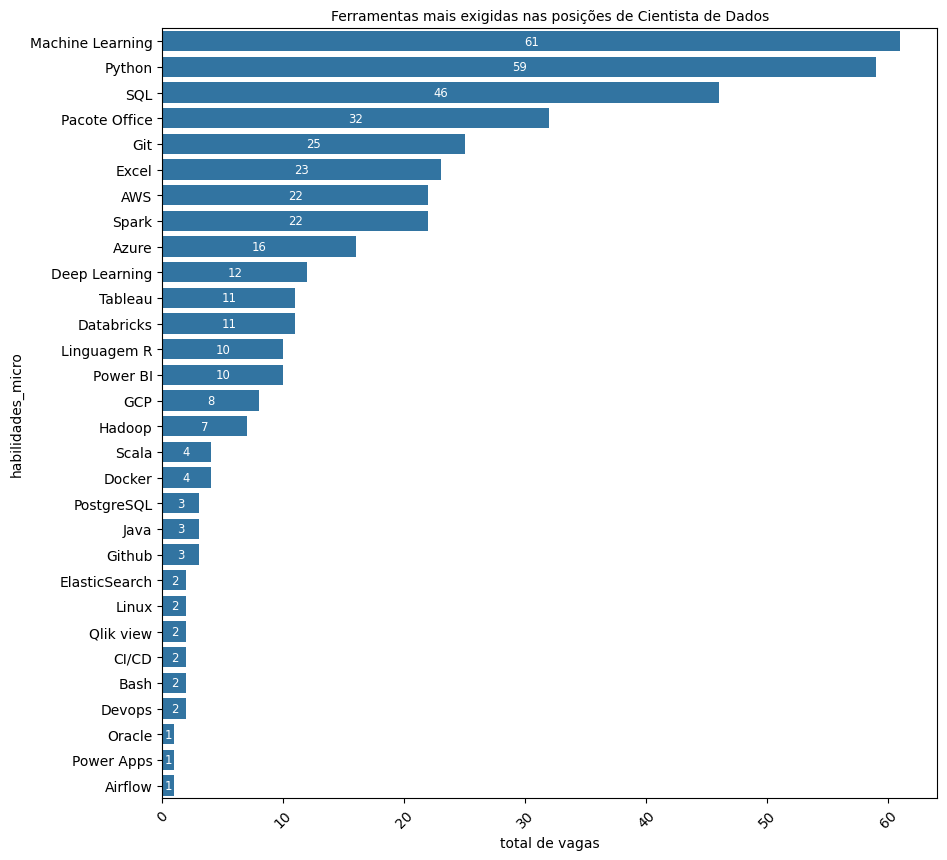

In [222]:
df_aux = df_cientista.explode('habilidades_micro')

barplot(
    title = 'Ferramentas mais exigidas nas posições de Cientista de Dados',
    group = 'habilidades_micro',
    agg='link_site',
    agg_name='total de vagas',
    agg_func = 'count',
    data = df_aux,
    orient='v',
    figsize=(10,10)
)

### Engenheiro de Dados

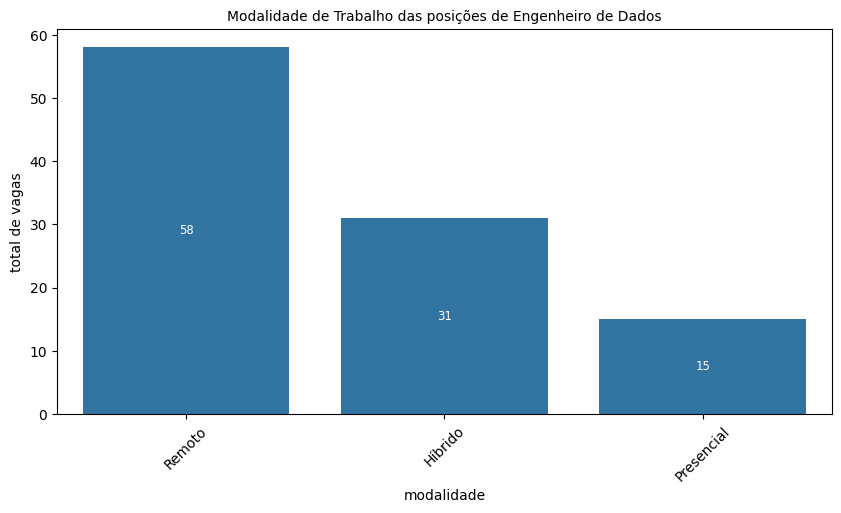

In [223]:
barplot(
    title = 'Modalidade de Trabalho das posições de Engenheiro de Dados',
    group = 'modalidade',
    agg='link_site',
    agg_name='total de vagas',
    agg_func = 'count',
    data = df_engenheiro
)

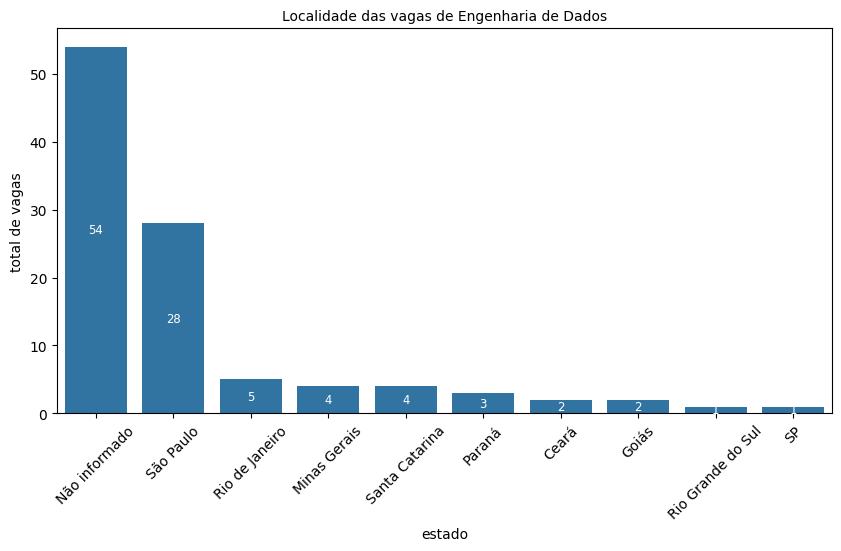

In [224]:
barplot(
    title = 'Localidade das vagas de Engenharia de Dados',
    group = 'estado',
    agg='link_site',
    agg_name='total de vagas',
    agg_func = 'count',
    data = df_engenheiro
)

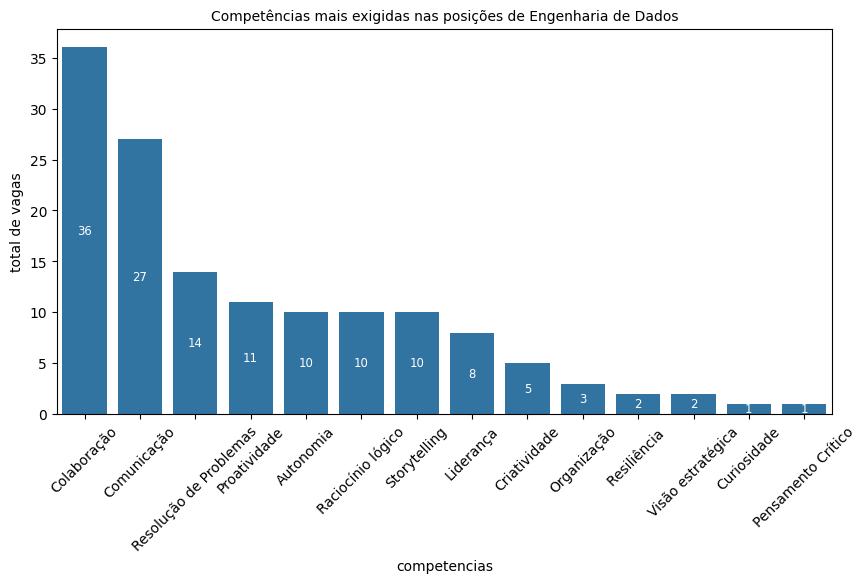

In [225]:
df_aux = df_engenheiro.explode('competencias')

barplot(
    title = 'Competências mais exigidas nas posições de Engenharia de Dados',
    group = 'competencias',
    agg='link_site',
    agg_name='total de vagas',
    agg_func = 'count',
    data = df_aux
)

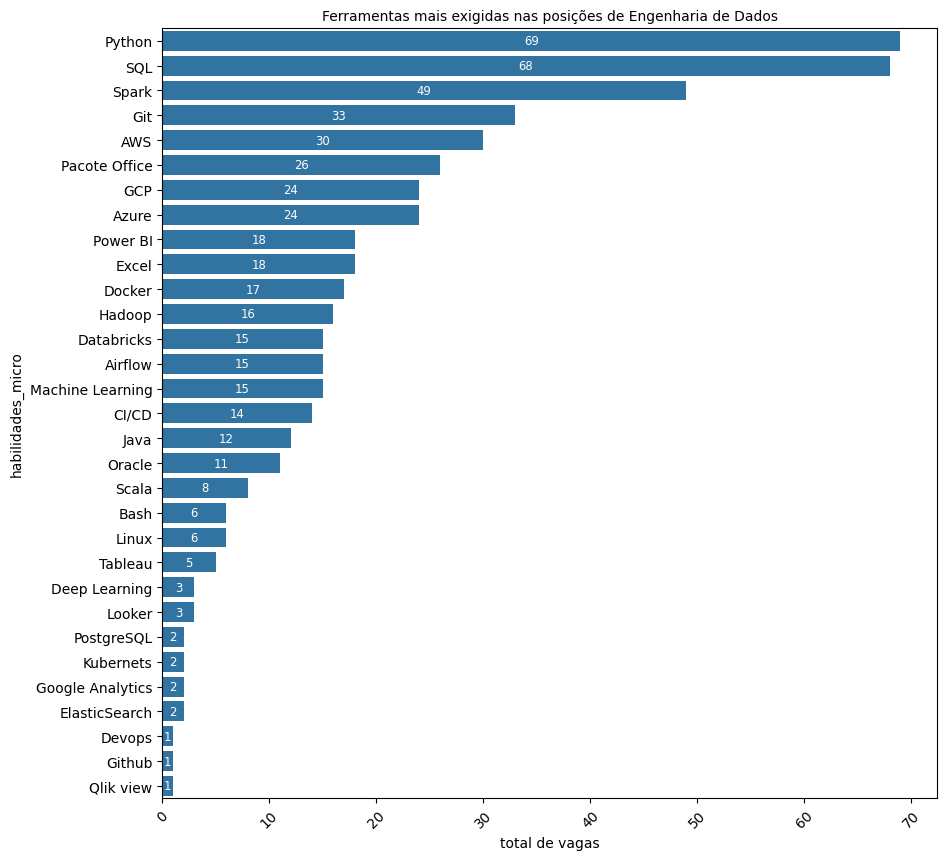

In [226]:
df_aux = df_engenheiro.explode('habilidades_micro')

barplot(
    title = 'Ferramentas mais exigidas nas posições de Engenharia de Dados',
    group = 'habilidades_micro',
    agg='link_site',
    agg_name='total de vagas',
    agg_func = 'count',
    data = df_aux,
    orient='v',
    figsize=(10,10)
)